## Model Training

#### Import data and required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 

import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [13]:
# get numberical and categorical columns
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

# Create column transformer which normalize numerical values and convert categorical columns to numeric
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('StandardScaler', numeric_transformer, numerical_features),
        ('OneHotEncoder', oh_transformer, categorical_features),
    ]
)

In [14]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [15]:
# split data into train-test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square    

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2924
- Mean Absolute Error: 4.2206
- R2 Score: 0.8767
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4580
- Mean Absolute Error: 4.3281
- R2 Score: 0.8755


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5375
- Mean Absolute Error: 5.1443
- R2 Score: 0.8119
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.6348
- Mean Absolute Error: 5.3017
- R2 Score: 0.8160


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2926
- Mean Absolute Error: 4.2202
- R2 Score: 0.8767
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4612
- Mean Absolute Error: 4.3274
- R2 Score: 0.8753


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5558
- Mean Absolute Error: 4.3490
- R2 Score: 0.8641
-----------------------

#### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model Name,R2_score
0,Linear Regression,0.875488
2,Ridge,0.875338
7,CatBoosting Regressor,0.839982
5,Random Forest Regressor,0.838758
6,XGBRegressor,0.831886
1,Lasso,0.816003
8,AdaBoost Regressor,0.809014
3,K-Neighbors Regressor,0.764168
4,Decision Tree,0.676234


#### Best fit Model - Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.55


#### Plot y_pred and y_test

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylablel'

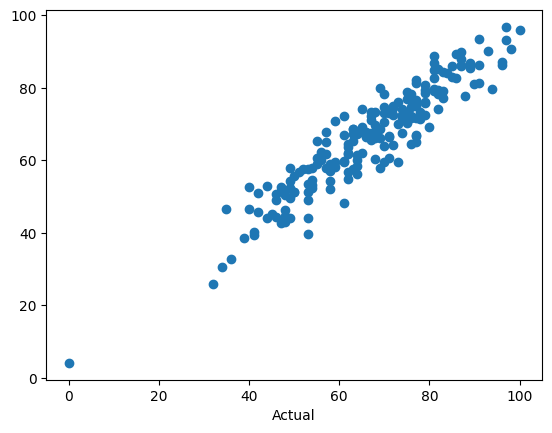

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylablel('Predicted')

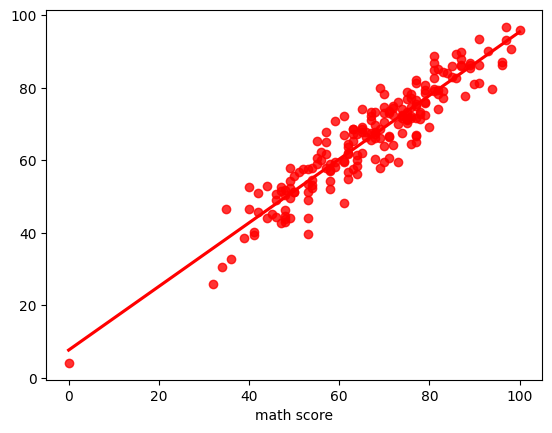

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
544,64,56.127193,7.872807
515,76,74.717371,1.282629
193,77,64.942880,12.057120
11,40,52.608135,-12.608135
279,73,59.413309,13.586691
...,...,...,...
860,53,49.031701,3.968299
379,66,67.825210,-1.825210
896,36,32.871816,3.128184
809,59,58.054721,0.945279
